In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## LOADING THE DATASET

In [2]:
test_data = pd.read_csv("test_data.txt", sep=" ::: ", 
    names=['id', 'title', 'genre', 'description'], 
    engine='python',
    skipinitialspace = True)

train_data = pd.read_csv("train_data.txt", sep=" ::: ", 
    names=['id', 'title', 'genre', 'description'], 
    engine='python',
    skipinitialspace = True)

## Merging the Files to Form a Single Dataset

In [3]:
df = pd.concat([train_data, test_data], ignore_index=False)

In [4]:
df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
df.tail()

,id,title,genre,description
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...,NaN
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,...",NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ...",NaN
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms a...",NaN


## Data Cleaning


In [6]:
#checking null values
df.isna().sum()

id                 0
title              0
genre              0
description    54200
dtype: int64

In [7]:
df.dropna(subset=['description'], inplace=True)  # Drop rows with NaN values in the specified column

In [8]:
df.isna().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [9]:
df.reset_index(drop=True, inplace=True)  # Reset index without adding a new index column

In [10]:
df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [11]:
df.tail()

,id,title,genre,description
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense h..."


In [12]:
print(df.columns)
print(df.index)

Index(['id', 'title', 'genre', 'description'], dtype='object')
RangeIndex(start=0, stop=54214, step=1)


In [13]:
#checking duplicated values 
duplicates = df.duplicated(subset=["id", "description","title"])
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
54209    False
54210    False
54211    False
54212    False
54213    False
Length: 54214, dtype: bool


In [14]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [15]:
#importing the important libraries
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
df['genre'].value_counts()

drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: genre, dtype: int64

In [17]:
df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

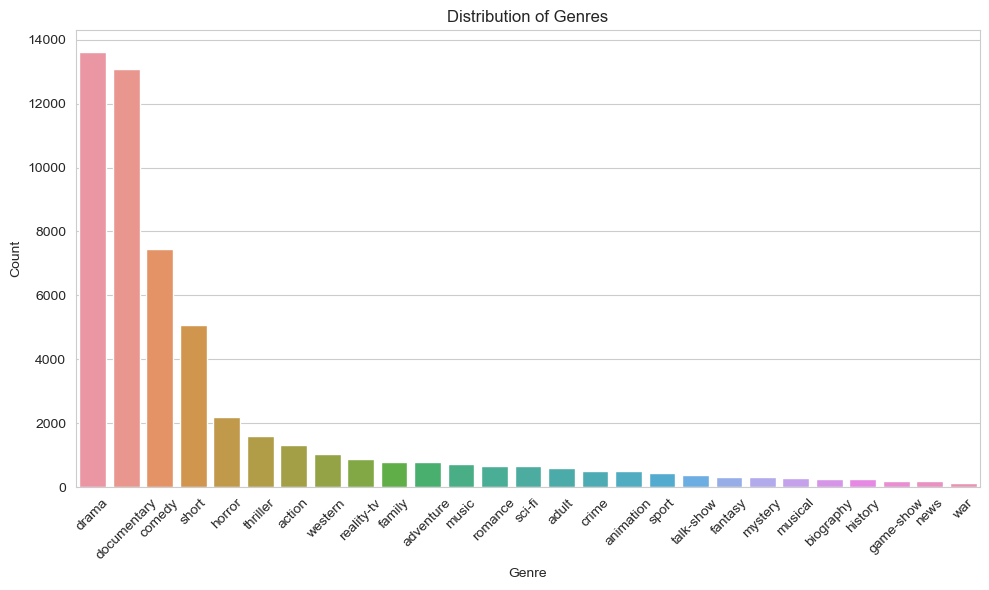

In [18]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(data=df, x="genre", order=df["genre"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Genres")
plt.tight_layout()

plt.show()

In [19]:
df['description length']=df['description'].apply(lambda x:len(x))  # calculating length of description for each row
df.head()

,id,title,genre,description,description length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624


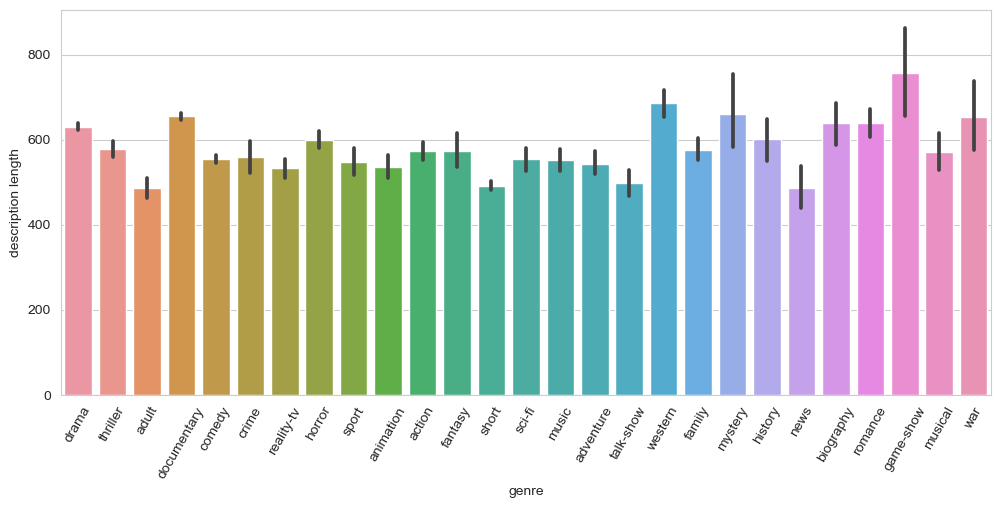

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='description length',data=df)   # average length and its deviation for all classes
plt.xticks(rotation=60)
plt.show()

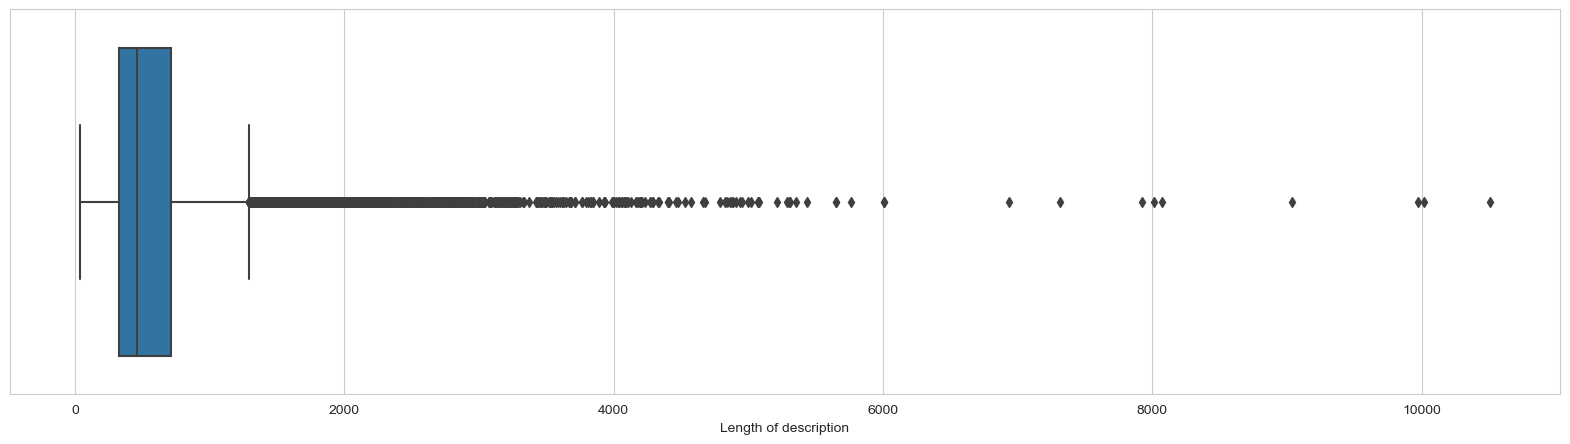

In [21]:
#checking outliers using boxplot
plt.figure(figsize=(20,5))
sns.boxplot(x=df['description length'].values,hue='genre',data=df)  # description length across all classes
plt.xlabel('Length of description')
plt.show()

## Text Preprocessing

In [22]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def Transformed_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Replace hyphens with spaces
    text = re.sub('-', ' ', text)
    
    # Remove digits
    text = re.sub(r'\d', ' ', text)
    
    # Initialize stemming and stopwords removal
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # Tokenize words, remove stopwords, and stem
    words = nltk.tokenize.word_tokenize(text, language="english", preserve_line=True)
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    
    # Remove Twitter handles
    text = re.sub(r'@\S+', '', ' '.join(words))
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove 'pic.' references
    text = re.sub(r'pic\.\S+', '', text)
    
    # Keep only letters and single quotes
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    
    # Keep words with length > 1
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    
    # Remove repeated, leading, and trailing spaces
    text = re.sub("\s[\s]+", " ", text).strip()
    
    return text

In [23]:
df['description'][0]

'Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [24]:
Transformed_text('Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.')

'listen convers doctor parent year old oscar learn nobodi courag tell him week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stairs christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue'

In [25]:
df['new_desc']=df['description'].apply(Transformed_text)

In [26]:
df.head()

,id,title,genre,description,description length,new_desc
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545,listen convers doctor parent year old oscar le...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183,brother sister past incestu relationship curre...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649,bu empti student field trip museum natur histo...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081,help unemploy father make end meet edith twin ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624,film titl refer recov bodi ground zero also st...


In [27]:
df.head()

,id,title,genre,description,description length,new_desc
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545,listen convers doctor parent year old oscar le...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183,brother sister past incestu relationship curre...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649,bu empti student field trip museum natur histo...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081,help unemploy father make end meet edith twin ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624,film titl refer recov bodi ground zero also st...


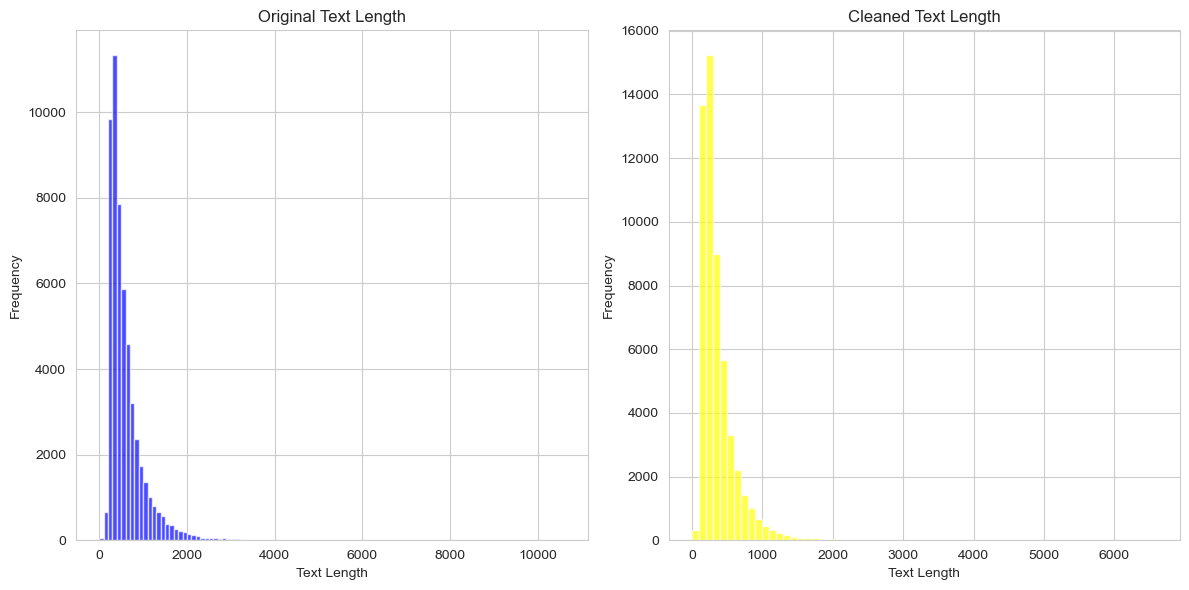

In [28]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = df['description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='blue', alpha=0.7)
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = df['new_desc'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='yellow', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
df['length_new_desc']=df['new_desc'].apply(lambda x:len(x))

In [30]:
df.head()

,id,title,genre,description,description length,new_desc,length_new_desc
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545,listen convers doctor parent year old oscar le...,344
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183,brother sister past incestu relationship curre...,111
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649,bu empti student field trip museum natur histo...,350
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081,help unemploy father make end meet edith twin ...,679
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624,film titl refer recov bodi ground zero also st...,355


In [31]:
(df['length_new_desc']>2000).value_counts()

False    54092
True       122
Name: length_new_desc, dtype: int64

In [32]:
print('Dataframe size (before removal): ', len(df))

filt = df['length_new_desc'] > 2000
df.drop(df[filt].index, axis=0, inplace=True)  # Remove rows where length_new_desc > 2000

print('Dataframe size (after removal): ', len(df))
print(f'Removed rows: {filt.sum()}')


Dataframe size (before removal):  54214
Dataframe size (after removal):  54092
Removed rows: 122


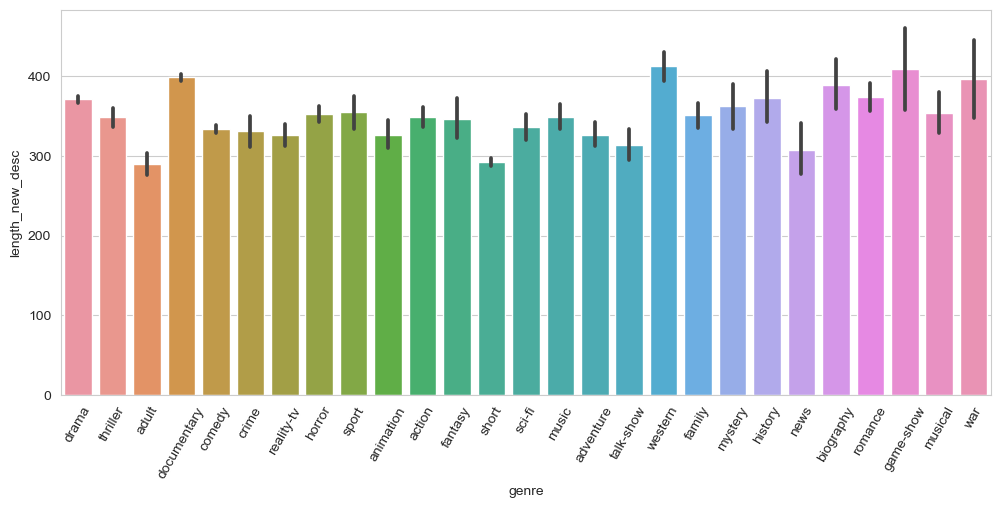

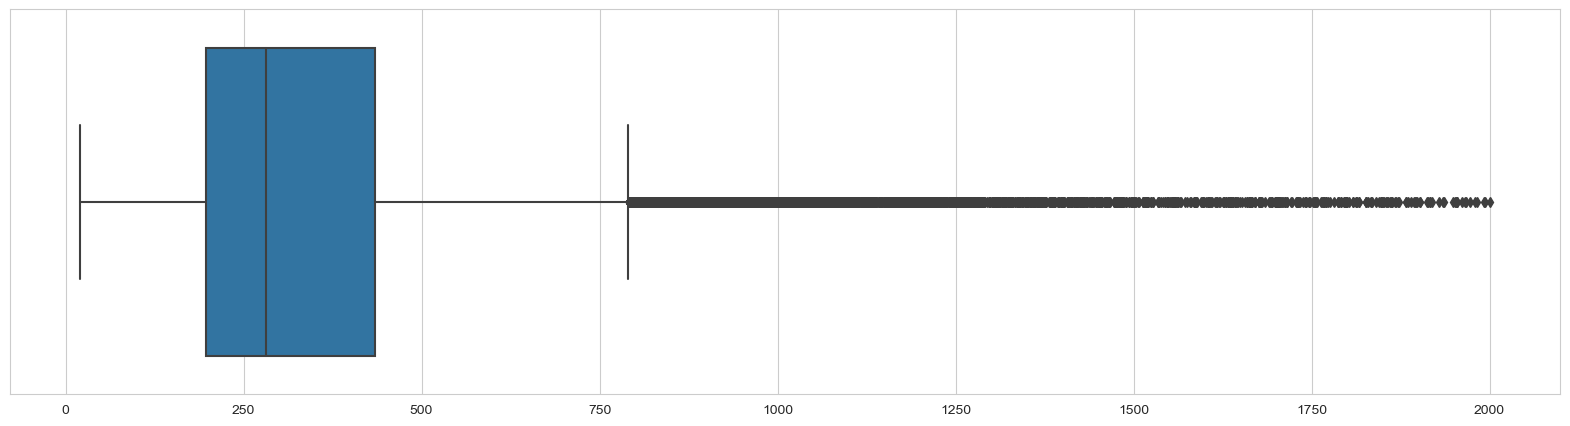

In [33]:
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='length_new_desc',data=df)  # from 600ish to 350ish -> significant reduction in length
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=df['length_new_desc'].values,hue='genre',data=df)
plt.show()

In [34]:
df.drop(columns=['title','description','description length','length_new_desc'],axis=1,inplace=True)     # drop unnecessary columns for model
df.head()

,id,genre,new_desc
0,1,drama,listen convers doctor parent year old oscar le...
1,2,thriller,brother sister past incestu relationship curre...
2,3,adult,bu empti student field trip museum natur histo...
3,4,drama,help unemploy father make end meet edith twin ...
4,5,drama,film titl refer recov bodi ground zero also st...


## Model Building 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


In [36]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [37]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
}

In [45]:
 from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

x = df['new_desc']
y = df['genre']

# Sample a larger subset of the data
x, y = shuffle(x, y, random_state=42)
subset_size_30_percent = int(0.30 * len(x))
subset_size_40_percent = int(0.40 * len(x))
subset_size_50_percent = int(0.50 * len(x))

x_subset_30_percent = x[:subset_size_30_percent]
y_subset_30_percent = y[:subset_size_30_percent]

x_subset_40_percent = x[:subset_size_40_percent]
y_subset_40_percent = y[:subset_size_40_percent]

x_subset_50_percent = x[:subset_size_50_percent]
y_subset_50_percent = y[:subset_size_50_percent]

# Split the subsets into train and test sets
x_train_30_percent, x_test_30_percent, y_train_30_percent, y_test_30_percent = train_test_split(x_subset_30_percent, y_subset_30_percent, test_size=0.2, random_state=42)
x_train_40_percent, x_test_40_percent, y_train_40_percent, y_test_40_percent = train_test_split(x_subset_40_percent, y_subset_40_percent, test_size=0.2, random_state=42)
x_train_50_percent, x_test_50_percent, y_train_50_percent, y_test_50_percent = train_test_split(x_subset_50_percent, y_subset_50_percent, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with sparse output
vocab_size = 20000
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size)
x_train_tfidf_30_percent = tfidf_vectorizer.fit_transform(x_train_30_percent)
x_test_tfidf_30_percent = tfidf_vectorizer.transform(x_test_30_percent)

x_train_tfidf_40_percent = tfidf_vectorizer.fit_transform(x_train_40_percent)
x_test_tfidf_40_percent = tfidf_vectorizer.transform(x_test_40_percent)

x_train_tfidf_50_percent = tfidf_vectorizer.fit_transform(x_train_50_percent)
x_test_tfidf_50_percent = tfidf_vectorizer.transform(x_test_50_percent)

# Iterate over classifiers and train them
for name, clf in clfs.items():
    clf.fit(x_train_tfidf_30_percent, y_train_30_percent)
    
    # Predict on the test data
    y_pred = clf.predict(x_test_tfidf_30_percent)
    
    # Calculate accuracy, precision, and F1-score
    accuracy = accuracy_score(y_test_30_percent, y_pred)
    precision = precision_score(y_test_30_percent, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test_30_percent, y_pred, average='weighted', zero_division=1)
    
    print("For", name)
    print("Subset Size: 30%")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("F1-Score:", f1)
    print("-----------------------------------")
    
    # Repeat the same process for 40% and 50% subsets
    clf.fit(x_train_tfidf_40_percent, y_train_40_percent)
    y_pred = clf.predict(x_test_tfidf_40_percent)
    accuracy = accuracy_score(y_test_40_percent, y_pred)
    precision = precision_score(y_test_40_percent, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test_40_percent, y_pred, average='weighted', zero_division=1)
    print("For", name)
    print("Subset Size: 40%")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("F1-Score:", f1)
    print("-----------------------------------")
    
    clf.fit(x_train_tfidf_50_percent, y_train_50_percent)
    y_pred = clf.predict(x_test_tfidf_50_percent)
    accuracy = accuracy_score(y_test_50_percent, y_pred)
    precision = precision_score(y_test_50_percent, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test_50_percent, y_pred, average='weighted', zero_division=1)
    print("For", name)
    print("Subset Size: 50%")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("F1-Score:", f1)
    print("-----------------------------------")



For SVC
Subset Size: 30%
Accuracy: 0.5499075785582255
Precision: 0.5691740305077386
F1-Score: 0.4920464403819618
-----------------------------------
For SVC
Subset Size: 40%
Accuracy: 0.5540665434380776
Precision: 0.5573121809741965
F1-Score: 0.5026152085592334
-----------------------------------
For SVC
Subset Size: 50%
Accuracy: 0.5754158964879852
Precision: 0.5966386585973739
F1-Score: 0.5315687952553244
-----------------------------------
For KN
Subset Size: 30%
Accuracy: 0.37030191004313
Precision: 0.3436986774291882
F1-Score: 0.34056547503389517
-----------------------------------
For KN
Subset Size: 40%
Accuracy: 0.3703789279112754
Precision: 0.34208751933584675
F1-Score: 0.3377242270650544
-----------------------------------
For KN
Subset Size: 50%
Accuracy: 0.37948243992606284
Precision: 0.35231253809001617
F1-Score: 0.34984424214755316
-----------------------------------
For NB
Subset Size: 30%
Accuracy: 0.42945163277880466
Precision: 0.6772037372659903
F1-Score: 0.2980437513

In [46]:
# Create an empty list to store DataFrames
performance_dfs = []

# Iterate over classifiers and train them
for name, clf in clfs.items():
    clf.fit(x_train_tfidf_30_percent, y_train_30_percent)
    y_pred = clf.predict(x_test_tfidf_30_percent)
    accuracy = accuracy_score(y_test_30_percent, y_pred)
    precision = precision_score(y_test_30_percent, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test_30_percent, y_pred, average='weighted', zero_division=1)
    df_30_percent = pd.DataFrame({'Algorithm': [name], 'Subset Size': ['30%'], 'Accuracy': [accuracy], 'Precision': [precision], 'F1-Score': [f1]})
    performance_dfs.append(df_30_percent)
    
    clf.fit(x_train_tfidf_40_percent, y_train_40_percent)
    y_pred = clf.predict(x_test_tfidf_40_percent)
    accuracy = accuracy_score(y_test_40_percent, y_pred)
    precision = precision_score(y_test_40_percent, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test_40_percent, y_pred, average='weighted', zero_division=1)
    df_40_percent = pd.DataFrame({'Algorithm': [name], 'Subset Size': ['40%'], 'Accuracy': [accuracy], 'Precision': [precision], 'F1-Score': [f1]})
    performance_dfs.append(df_40_percent)
    
    clf.fit(x_train_tfidf_50_percent, y_train_50_percent)
    y_pred = clf.predict(x_test_tfidf_50_percent)
    accuracy = accuracy_score(y_test_50_percent, y_pred)
    precision = precision_score(y_test_50_percent, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test_50_percent, y_pred, average='weighted', zero_division=1)
    df_50_percent = pd.DataFrame({'Algorithm': [name], 'Subset Size': ['50%'], 'Accuracy': [accuracy], 'Precision': [precision], 'F1-Score': [f1]})
    performance_dfs.append(df_50_percent)

# Concatenate all DataFrames into a single DataFrame
performance_df = pd.concat(performance_dfs, ignore_index=True)

# Print the performance DataFrame
print(performance_df)

   Algorithm Subset Size  Accuracy  Precision  F1-Score
0        SVC         30%  0.549908   0.569174  0.492046
1        SVC         40%  0.554067   0.557312  0.502615
2        SVC         50%  0.575416   0.596639  0.531569
3         KN         30%  0.370302   0.343699  0.340565
4         KN         40%  0.370379   0.342088  0.337724
5         KN         50%  0.379482   0.352313  0.349844
6         NB         30%  0.429452   0.677204  0.298044
7         NB         40%  0.436922   0.683636  0.304070
8         NB         50%  0.448059   0.678700  0.322040
9         DT         30%  0.351510   0.605279  0.270060
10        DT         40%  0.368068   0.629836  0.287417
11        DT         50%  0.364880   0.626935  0.283327
12        LR         30%  0.517252   0.503319  0.456630
13        LR         40%  0.535813   0.518610  0.480918
14        LR         50%  0.551386   0.546108  0.502718
15        RF         30%  0.462415   0.555023  0.368923
16        RF         40%  0.468808   0.542395  0

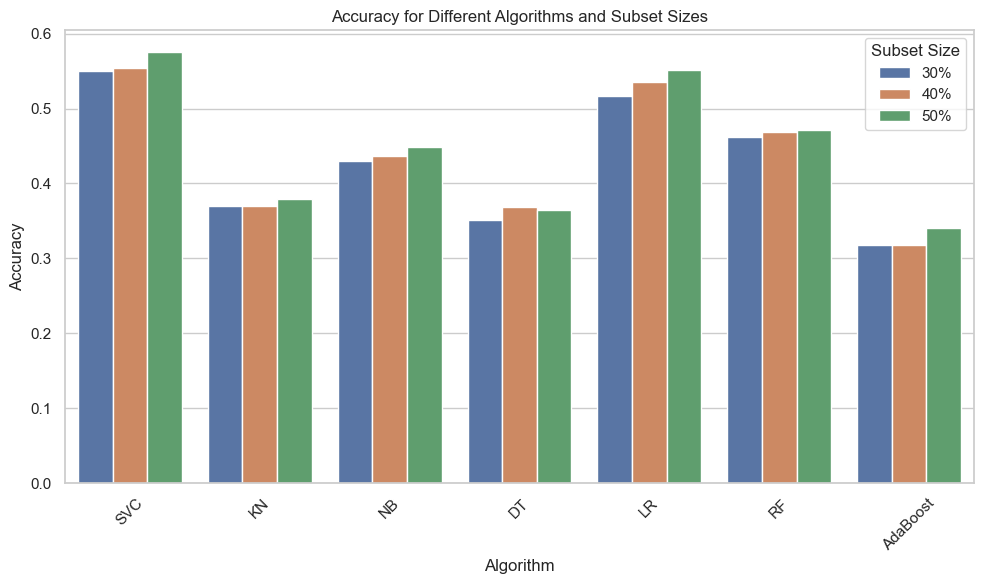

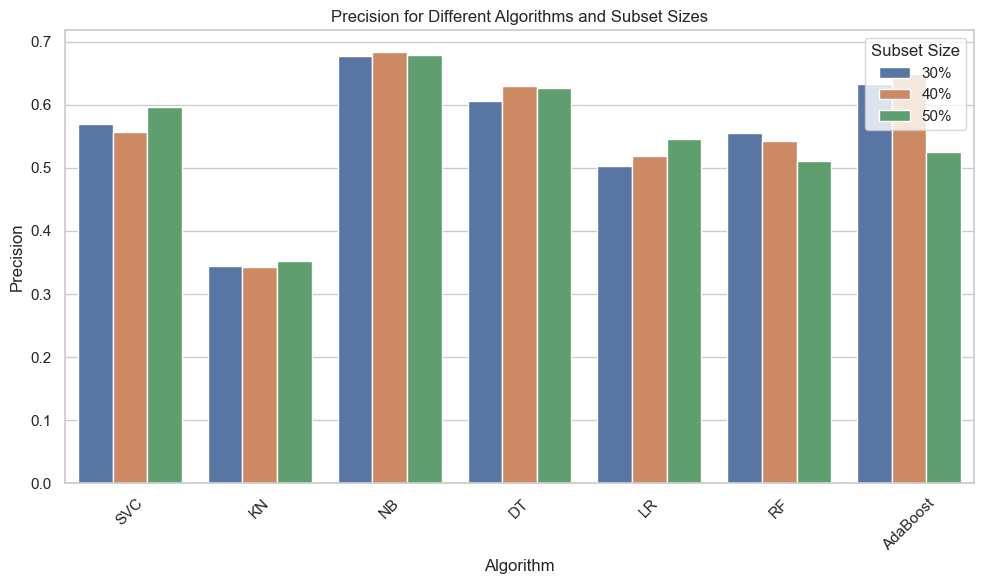

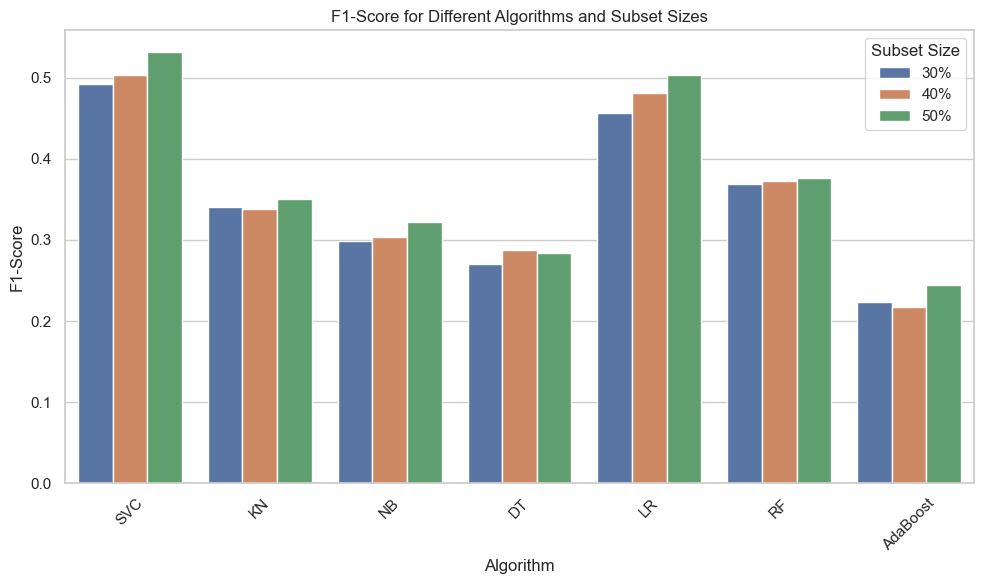

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x="Algorithm", y="Accuracy", hue="Subset Size")
plt.title('Accuracy for Different Algorithms and Subset Sizes')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.legend(title='Subset Size')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Create a bar plot for precision scores
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x="Algorithm", y="Precision", hue="Subset Size")
plt.title('Precision for Different Algorithms and Subset Sizes')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.legend(title='Subset Size')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Create a bar plot for F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x="Algorithm", y="F1-Score", hue="Subset Size")
plt.title('F1-Score for Different Algorithms and Subset Sizes')
plt.xlabel('Algorithm')
plt.ylabel('F1-Score')
plt.legend(title='Subset Size')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

x = df['new_desc']
y = df['genre']

# Sample a larger subset of the data
x, y = shuffle(x, y, random_state=42)
x_subset = x[:100000]  # Increase the subset size as needed
y_subset = y[:100000]

# Split the subset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with sparse output
vocab_size = 20000
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(x_train_tfidf, y_train)

# Predict using the trained model
y_pred = random_forest_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate overall precision score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("precision",precision)



Accuracy: 0.50
precision 0.5806010919710785


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle

x = df['new_desc']
y = df['genre']

# Sample a larger subset of the data
x, y = shuffle(x, y, random_state=42)
x_subset = x[:100000]  # Increase the subset size as needed
y_subset = y[:100000]

# Split the subset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Create a CountVectorizer for Bernoulli Naive Bayes
vocab_size = 20000
count_vectorizer = CountVectorizer(max_features=vocab_size, binary=True)
x_train_count = count_vectorizer.fit_transform(x_train)
x_test_count = count_vectorizer.transform(x_test)

# Create a Bernoulli Naive Bayes model
bernoulli_naive_bayes_model = BernoulliNB()

# Train the model on the training data
bernoulli_naive_bayes_model.fit(x_train_count, y_train)

# Predict using the trained model
y_pred = bernoulli_naive_bayes_model.predict(x_test_count)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate overall precision score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("precision",precision)

Accuracy: 0.54
precision 0.5200955693205176


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

x = df['new_desc']
y = df['genre']

# Sample a larger subset of the data
x, y = shuffle(x, y, random_state=42)
x_subset = x[:100000]  # Increase the subset size as needed
y_subset = y[:100000]

# Split the subset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with sparse output
vocab_size = 20000
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(x_train_tfidf, y_train)

# Predict using the trained model
y_pred = logistic_model.predict(x_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("precision",precision)

Accuracy: 0.58
precision 0.5723529982947504
